In [13]:
import pandas as pd
import pyodbc
from dotenv import load_dotenv
import os
import functions

In [14]:
# Specify Query
query = """
SELECT * FROM 
master_exercise_db
WHERE app_id = 1
"""

In [15]:
# Run query and ingest Data
df = functions.run_query(query)

Connected to the database successfully!
Now running query: 
SELECT * FROM 
master_exercise_db
WHERE app_id = 1

...
Data fetched and connection closed!
Dataframe Shape: (64412, 10)


In [16]:
functions.check_data(df)

Missing Values:
 activity_id            0
app_id                 0
datetime               0
elapsed_seconds        0
heart_rate         32164
speed                  0
distance               0
latitude           64412
longitude          64412
altitude           64412
dtype: int64

Duplicates:
 0


In [17]:
filtered_df = df.dropna(subset='heart_rate')

In [18]:
first_run = filtered_df['activity_id'].unique().tolist()[0]
print(first_run)

David+_Diaz+_2024-02-06_14-43-30.CSV


In [19]:
single_run = filtered_df[filtered_df['activity_id'] == first_run]

In [20]:
hr = single_run['heart_rate']
time = single_run['elapsed_seconds']

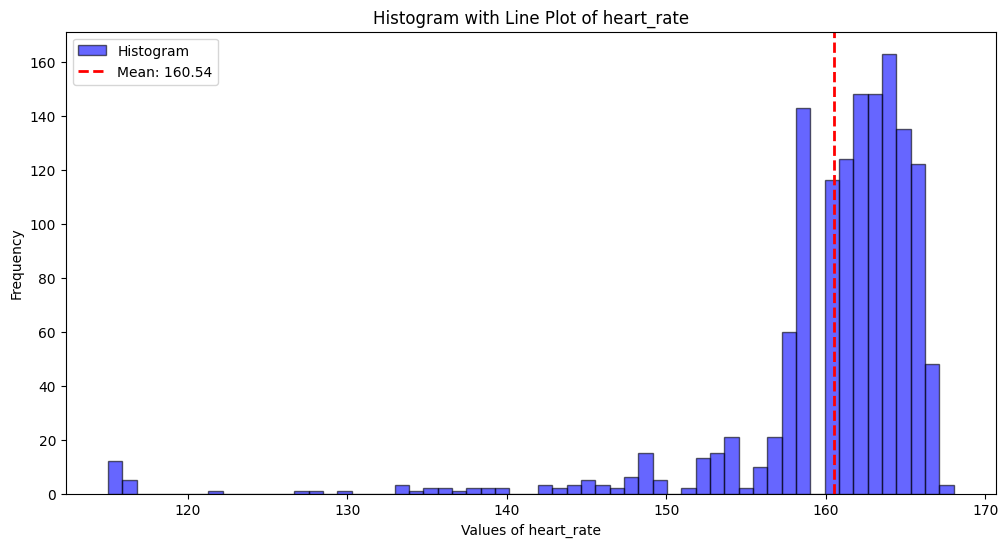

In [21]:
functions.visualize_hist(hr)

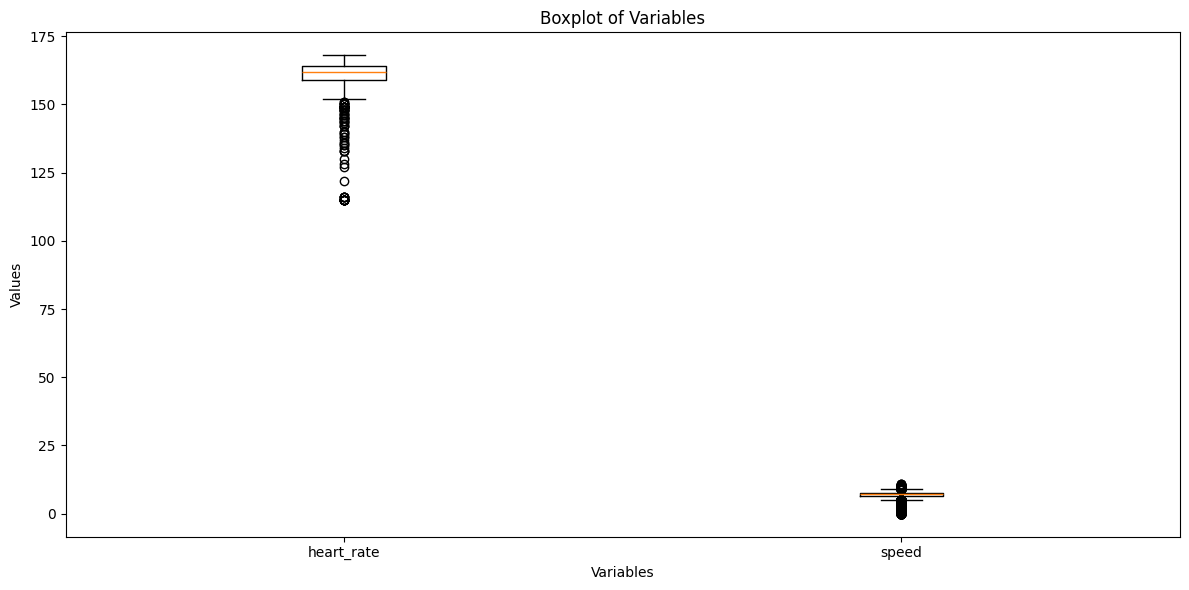

In [36]:
speed = filtered_df['speed']
functions.visualize_boxplot(hr, speed)

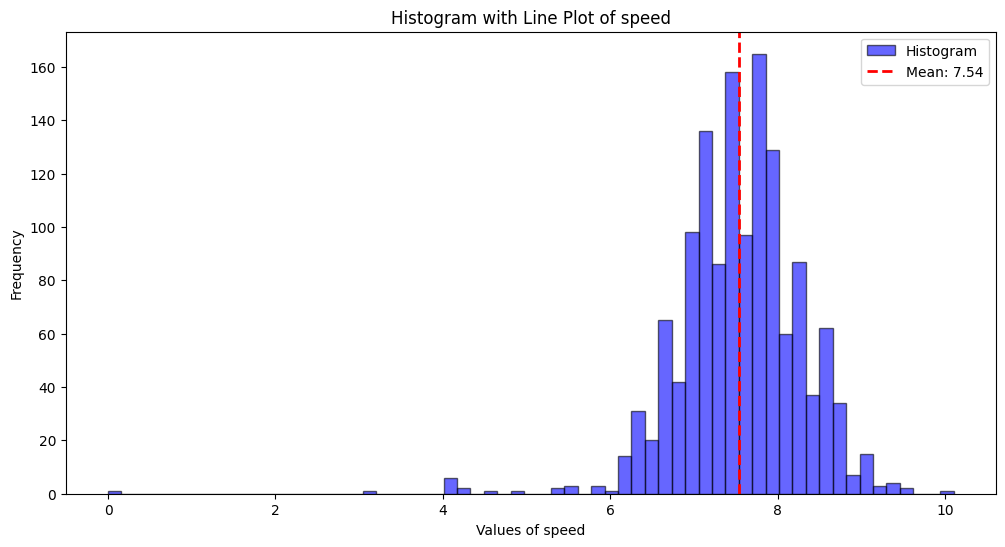

In [24]:
functions.visualize_hist(single_run['speed'])

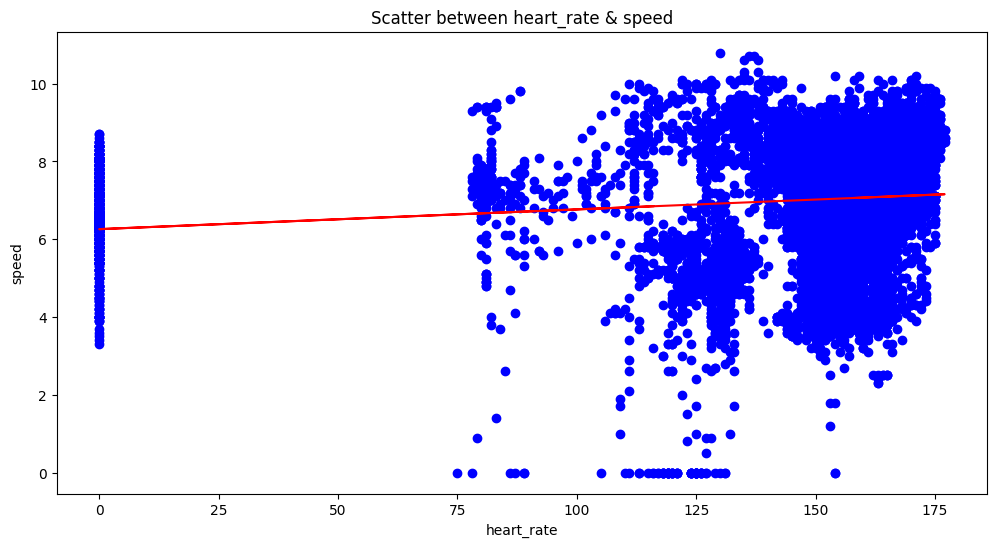

In [31]:
functions.visualize_scatter(filtered_df['heart_rate'], filtered_df['speed'], regression=True)

In [66]:
def visualize_lineplot(x, *args, **kwargs):
    """
    Create a line plot for the variables provided, with an option to scale y variables.

    Parameters:
    - x: The x-axis data (list, Series, or DataFrame column).
    - *args: One or more y variables (can be lists, Series, or DataFrame columns).
    - **kwargs: Additional keyword arguments for customization, such as:
        - scale (bool): Whether to scale y variables using Min-Max scaling. Default is False.
        - labels (list): Labels for the y variables.
        - title, xlabel, ylabel: Plot customization.
        - figsize: Size of the plot (default is (10, 6)).
        - linestyle: Style of the line.

    Returns:
    - A Matplotlib figure and axis objects.
    """
    import matplotlib.pyplot as plt
    import pandas as pd

    # Convert x to a Pandas Series if it isn't already
    if not isinstance(x, (pd.Series, list)):
        raise ValueError("x must be a list or Pandas Series")
    x = pd.Series(x)  # Ensure x is always a Series for consistency
    x = x.sort_values()

    # Initialize the plot
    fig, ax = plt.subplots(figsize=kwargs.get("figsize", (10, 6)))

    # Plot each y variable
    for i, y in enumerate(args):
        label = kwargs.get("labels", [f"y{i+1}" for i in range(len(args))])[i]
        
        if isinstance(y, (pd.Series, list)):
            y_data = pd.Series(y)

            # Apply Min-Max scaling if requested
            if kwargs.get("scale", False):
                y_min, y_max = y_data.min(), y_data.max()
                y_data = (y_data - y_min) / (y_max - y_min)

            ax.plot(x, y_data, label=label, linestyle=kwargs.get("linestyle", '-'))

        elif isinstance(y, pd.DataFrame):
            # Handle numeric columns of a DataFrame
            for col in y.select_dtypes(include='number'):
                y_data = y[col]

                # Apply Min-Max scaling if requested
                if kwargs.get("scale", False):
                    y_min, y_max = y_data.min(), y_data.max()
                    y_data = (y_data - y_min) / (y_max - y_min)

                ax.plot(x, y_data, label=f"{col} ({label})", linestyle=kwargs.get("linestyle", '-'))

    # Customizations
    ax.set_xlabel(kwargs.get("xlabel", x.name))
    ax.set_ylabel(kwargs.get("ylabel", "Y-axis"))
    ax.set_title(kwargs.get("title", "Line Plot"))
    ax.legend(loc=kwargs.get("legend_loc", "best"))

    # Display the plot
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return fig, ax

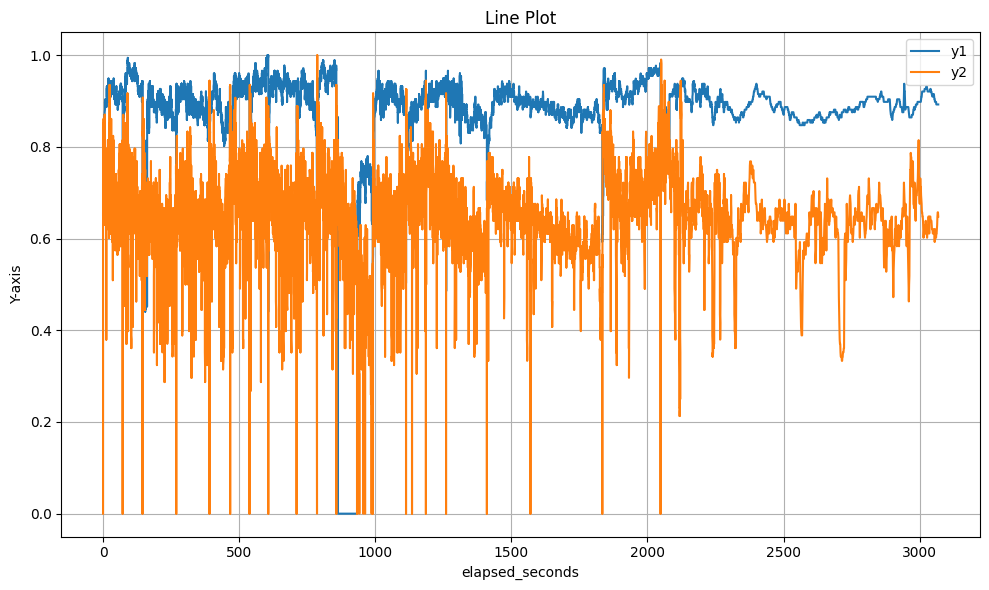

(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': 'Line Plot'}, xlabel='elapsed_seconds', ylabel='Y-axis'>)

In [67]:

visualize_lineplot(filtered_df['elapsed_seconds'], filtered_df['heart_rate'], filtered_df['speed'], scale=True)

In [68]:
from scipy.stats import pearsonr, spearmanr
# Pearson Correlation
r, p_value = pearsonr(filtered_df['speed'], filtered_df['heart_rate'])
print(f"Pearson r: {r}, p-value: {p_value}")

Pearson r: 0.15981824426831714, p-value: 1.8722168932899827e-183


In [70]:
filtered_df['speed']

0        0.0
1        3.2
2        5.9
3        5.9
4        7.5
        ... 
64407    6.8
64408    7.0
64409    7.1
64410    7.1
64411    7.0
Name: speed, Length: 32248, dtype: float64

In [72]:
subset = filtered_df[(filtered_df['heart_rate'] > 110) & (filtered_df['speed'] > 3)]


In [73]:
y1 = subset['speed']
y2 = subset['heart_rate']

In [74]:
r2, p_value2 = pearsonr(y1, y2)
print(f"Pearson r: {r2}, p-value: {p_value2}")

Pearson r: 0.29876444704317556, p-value: 0.0


In [78]:
print(f"Min HR: {y2.min()} \n Min speed: {y1.min()}")

Min HR: 111.0 
 Min speed: 3.1


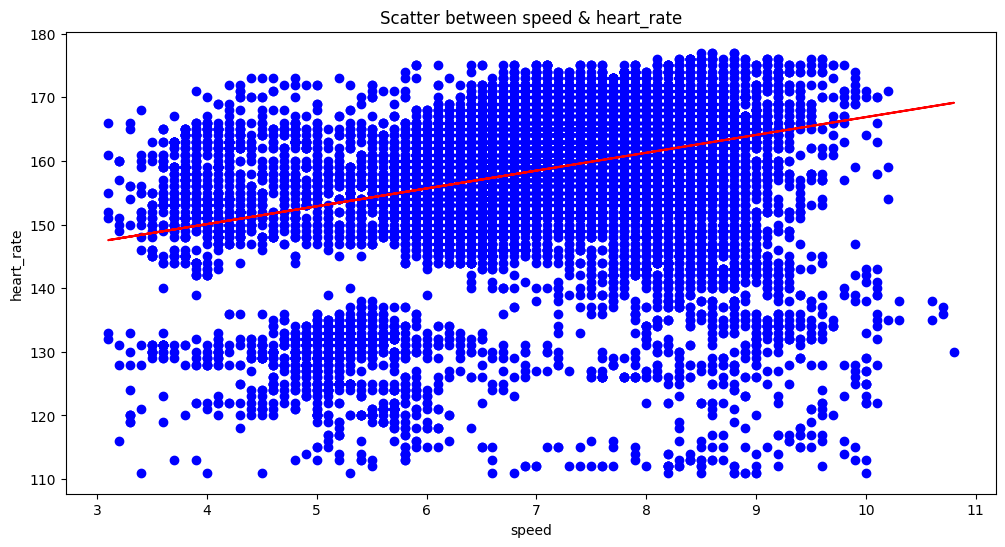

In [80]:
functions.visualize_scatter(y1, y2, regression=True)